Using CAMB 1.4.0 installed at /Users/danielsb/opt/anaconda3/envs/camb/lib/python3.9/site-packages/camb
Note: redshifts have been re-sorted (earliest first)


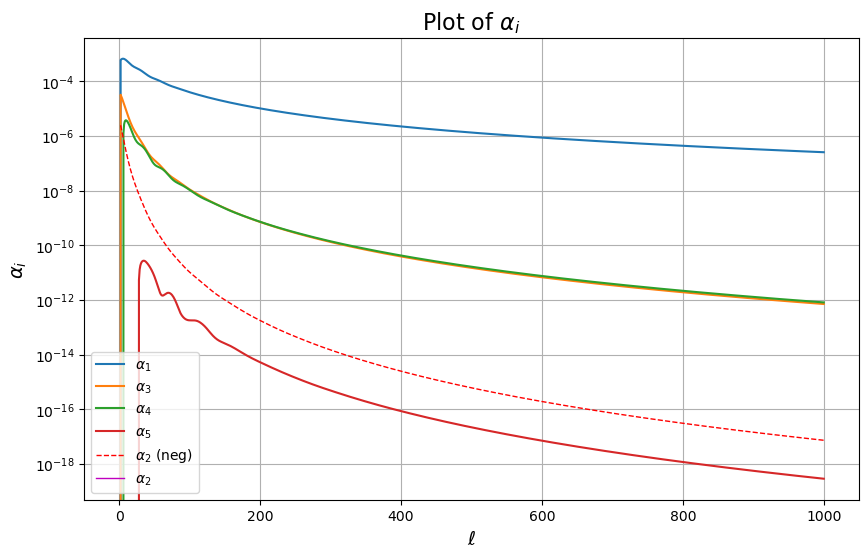

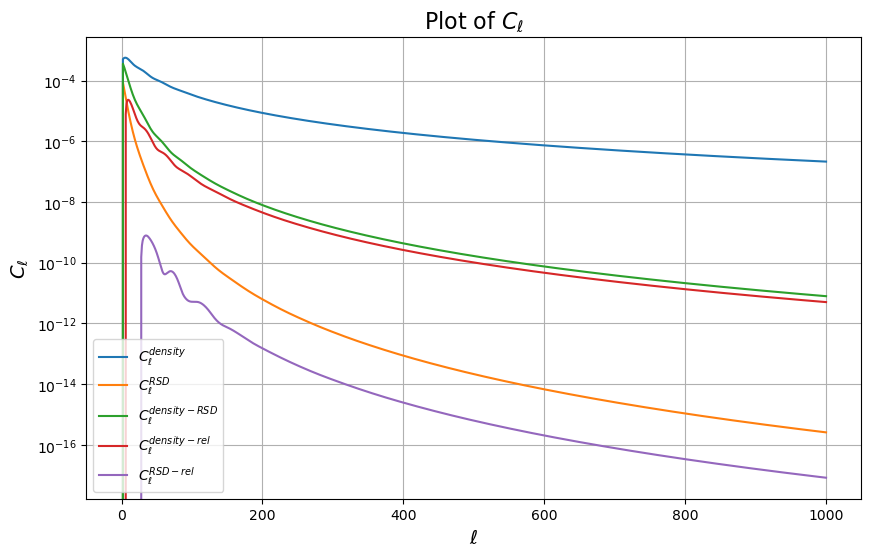

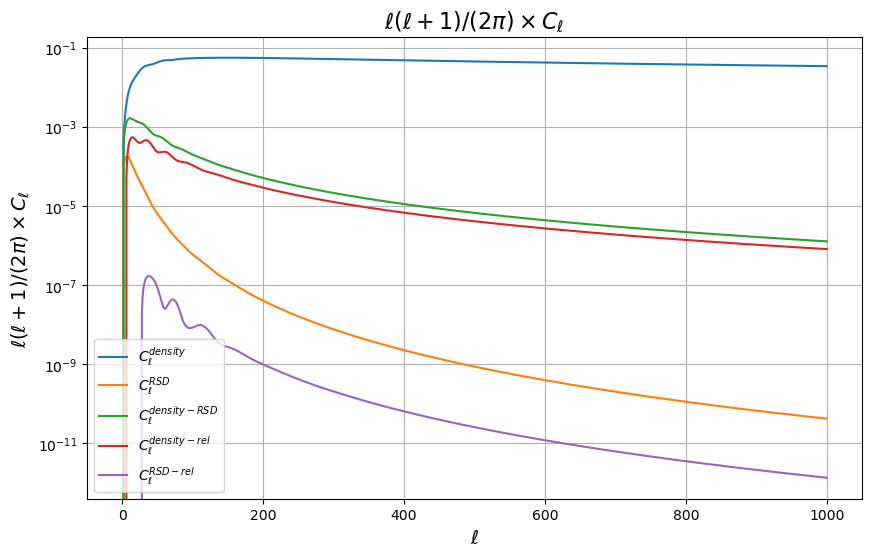

In [1]:
%run alphas_calculation.py

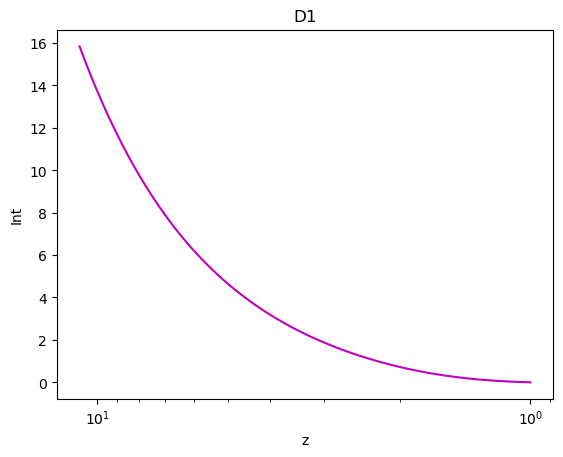

In [2]:
%run class_cosmo_quantities_old.py

In [1]:
# Define a parameter file out of the parameters used in alphas_calculation.py

params = {
    'Omega_m' : 0.31,
    'Omega_Lambda' : 0.69,
    'H_0' : 67.66,
    'ombh2' : 0.02236,
    'omch2' : 0.1200,
    'mnu' : 0.06,
    'omk' : 0,
    'tau' : 0.0544,
    'As' : 2.100549e-9,    
    'ns' : 0.9652,
    'r' : 0,
    'z' : 0.15,
    'sigma' : 0.02,
    'bias_F' : 1.,
    'bias_B' : 1.5,
    'lmax' : 1000
}

In [2]:
params

{'Omega_m': 0.31,
 'Omega_Lambda': 0.69,
 'H_0': 67.66,
 'ombh2': 0.02236,
 'omch2': 0.12,
 'mnu': 0.06,
 'omk': 0,
 'tau': 0.0544,
 'As': 2.100549e-09,
 'ns': 0.9652,
 'r': 0,
 'z': 0.15,
 'sigma': 0.02,
 'bias_F': 1.0,
 'bias_B': 1.5,
 'lmax': 1000}

In [3]:
from alphas_calculation import alphas

Using CAMB 1.4.0 installed at /Users/danielsb/opt/anaconda3/envs/camb/lib/python3.9/site-packages/camb


Using CAMB 1.4.0 installed at /Users/danielsb/opt/anaconda3/envs/camb/lib/python3.9/site-packages/camb
Note: redshifts have been re-sorted (earliest first)


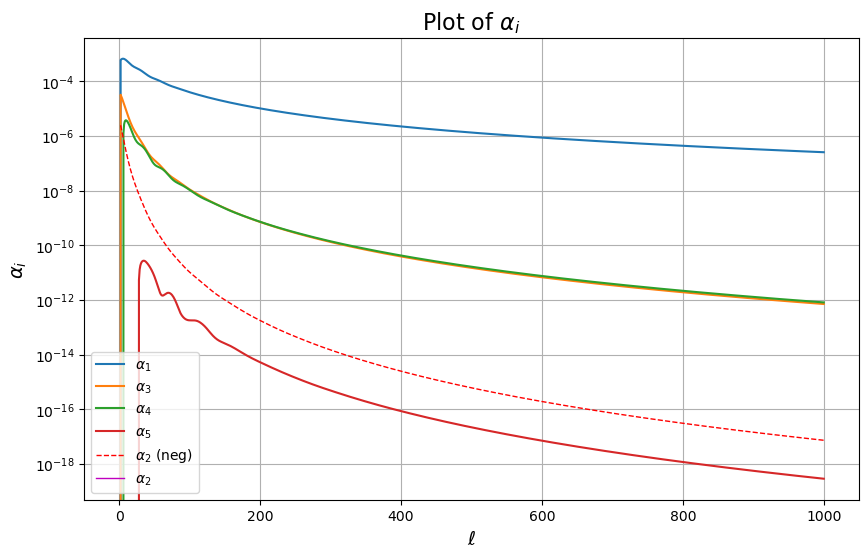

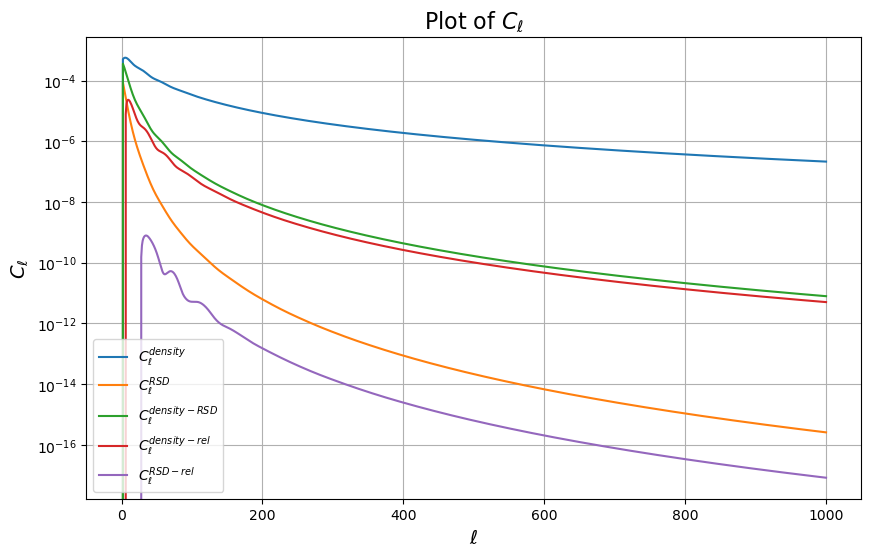

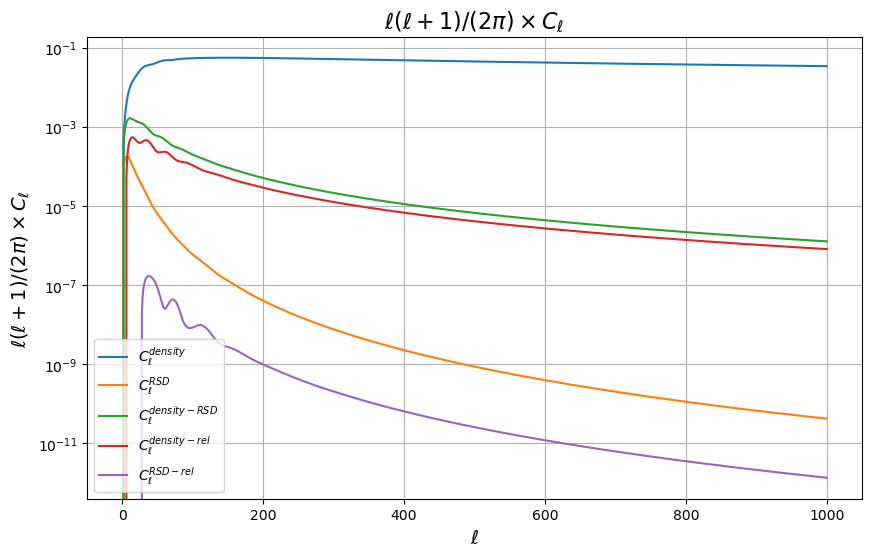

In [7]:
%run alphas_calculation.py **params

In [4]:
alpha_funcs = alphas(**params)

In [5]:
# Computes the alphas integrals and the Cells

alpha1_arr = alpha_funcs.calculate_alpha_1()

In [6]:
alpha_1, Cell1 = alpha1_arr

In [7]:
type(alpha_1), type(Cell1)

(numpy.ndarray, numpy.ndarray)

In [8]:
import numpy as np

alpha_loaded = np.load('alpha_integrals.npz')

In [9]:
alpha_1_loaded = alpha_loaded['alpha_1']

In [10]:
np.allclose(alpha_1, alpha_1_loaded)

True

In [11]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 2, 3, 4, 5])

np.outer(a,b)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [12]:
sol = np.outer(a,b).flatten()

In [13]:
sol

array([ 1,  2,  3,  4,  5,  2,  4,  6,  8, 10,  3,  6,  9, 12, 15,  4,  8,
       12, 16, 20,  5, 10, 15, 20, 25])

In [14]:
a[0]

1

In [15]:
sol = np.outer(a[0],b[0]).flatten()

In [16]:
sol

array([1])

In [17]:
np.transpose(np.array([sol,]*len(np.arange(10))))

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [18]:
# Define a parameter file out of the parameters used in alphas_calculation.py

params_signals = {
    'Omega_m' : 0.31,
    'Omega_Lambda' : 0.69,
    'H_0' : 67.66,
    'z' : 0.15,
    'bias_F' : 1.,
    'bias_B' : 1.5,
    'lmax' : 1000
}

In [19]:
from signals import Signals

my_signals = Signals(**params_signals)

In [20]:
Cell1_new = my_signals.Cell1_new()

In [21]:
type(Cell1_new), np.shape(Cell1_new)

(numpy.ndarray, (1, 1001))

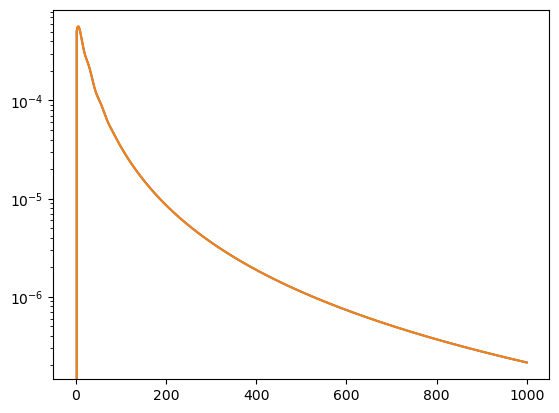

In [22]:
import matplotlib.pyplot as plt

plt.plot(Cell1_new[0])
plt.plot(Cell1)

plt.yscale('log')

In [23]:
s8int = alpha_funcs.sigma8()

Note: redshifts have been re-sorted (earliest first)


In [24]:
s8int(0.0)

array(0.81215518)

In [26]:
Cell1_new[0]

array([0.00000000e+00, 0.00000000e+00, 5.08833774e-04, ...,
       2.15692277e-07, 2.15163931e-07, 2.14637375e-07])

In [27]:
Cell1

array([0.00000000e+00, 0.00000000e+00, 5.08748502e-04, ...,
       2.15656130e-07, 2.15127873e-07, 2.14601405e-07])

In [28]:
s8int_ = my_signals.s8

In [29]:
s8int_(0.0)

array(0.81215518)

In [30]:
params_signals = {
    'Omega_m' : 0.31,
    'Omega_Lambda' : 0.69,
    'H_0' : 67.66,
    'z' : [0.15, 0.25, 0.35],
    'bias_F' : [1., 1.2, 1.3],
    'bias_B' : [2.5, 2.2, 2.3],
    'lmax' : 1000
}

In [31]:
my_signals_ = Signals(**params_signals)

In [32]:
Cells_density = my_signals_.Cell1_new()

In [33]:
np.shape(Cells_density)

(9, 1001)

In [43]:
ell = np.arange(len(Cells_density[0]))


array([   0,    1,    2, ...,  998,  999, 1000])

Text(0, 0.5, '$\\ell(\\ell+1)\\,C_{\\ell}^{\\mathrm{DD}}/2\\pi$')

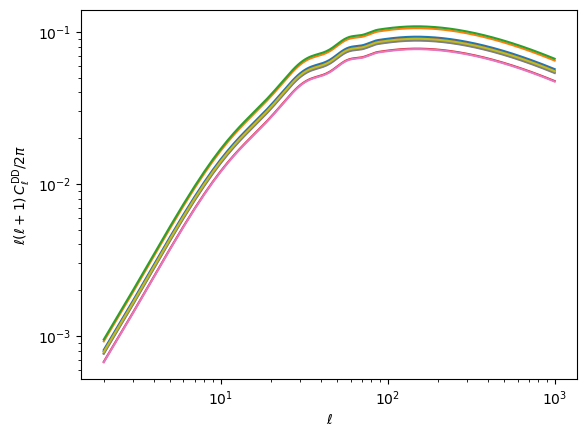

In [60]:
for k, Cell_z in enumerate(Cells_density):
    plt.plot(ell[2:], ell[2:]*(ell[2:]+1) * Cell_z[2:] / (2*np.pi))

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)\,C_{\ell}^{\mathrm{DD}}/2\pi$')

In [47]:
np.outer([0.15, 0.25, 0.35],[0.15, 0.25, 0.35]).flatten()

array([0.0225, 0.0375, 0.0525, 0.0375, 0.0625, 0.0875, 0.0525, 0.0875,
       0.1225])

In [48]:
0.15*0.15

0.0225

In [49]:
0.25*0.25

0.0625

In [50]:
0.35*0.35

0.12249999999999998

Text(0, 0.5, '$\\ell(\\ell+1)\\,C_{\\ell}^{\\mathrm{DD}}/2\\pi$')

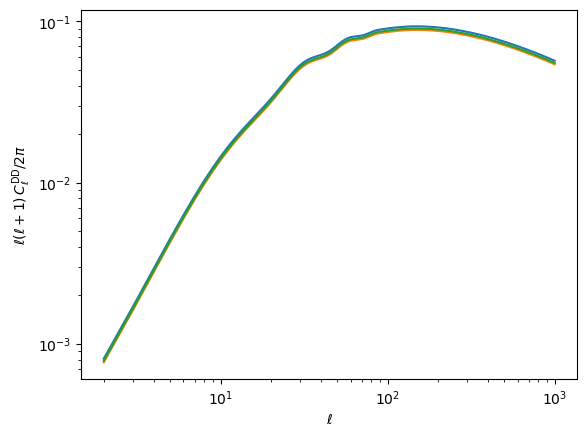

In [61]:
plt.plot(ell[2:], ell[2:]*(ell[2:]+1) * Cells_density[0,2:] / (2*np.pi))
plt.plot(ell[2:], ell[2:]*(ell[2:]+1) * Cells_density[4,2:] / (2*np.pi))
plt.plot(ell[2:], ell[2:]*(ell[2:]+1) * Cells_density[8,2:] / (2*np.pi))


plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)\,C_{\ell}^{\mathrm{DD}}/2\pi$')

In [4]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 2, 3, 4, 5])

c = np.outer(a,b)

print(c)

[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


In [5]:
mask = np.triu(np.ones_like(c), k=0).astype(bool)
factors = c[mask]

print(factors)

[ 1  2  3  4  5  4  6  8 10  9 12 15 16 20 25]


In [6]:
alpha1 = np.array([1]*5)

result = alpha1[np.newaxis,:] * factors[:,np.newaxis]

In [7]:
result

array([[ 1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5],
       [ 4,  4,  4,  4,  4],
       [ 6,  6,  6,  6,  6],
       [ 8,  8,  8,  8,  8],
       [10, 10, 10, 10, 10],
       [ 9,  9,  9,  9,  9],
       [12, 12, 12, 12, 12],
       [15, 15, 15, 15, 15],
       [16, 16, 16, 16, 16],
       [20, 20, 20, 20, 20],
       [25, 25, 25, 25, 25]])

In [1]:
from signals import Signals
import numpy as np

params_signals = {
    'Omega_m' : 0.31,
    'Omega_Lambda' : 0.69,
    'H_0' : 67.66,
    'z' : [0.15, 0.25, 0.35],
    'bias_F' : [1., 1.2, 1.3],
    'bias_B' : [2.5, 2.2, 2.3],
    'lmax' : 1000
}

my_signals = Signals(**params_signals)

In [2]:
Cell1_new = my_signals.Cell1_new()

In [3]:
np.shape(Cell1_new)

(6, 1001)

In [4]:
ell = np.arange(len(Cell1_new[0]))


Text(0, 0.5, '$\\ell(\\ell+1)\\,C_{\\ell}^{\\mathrm{DD}}/2\\pi$')

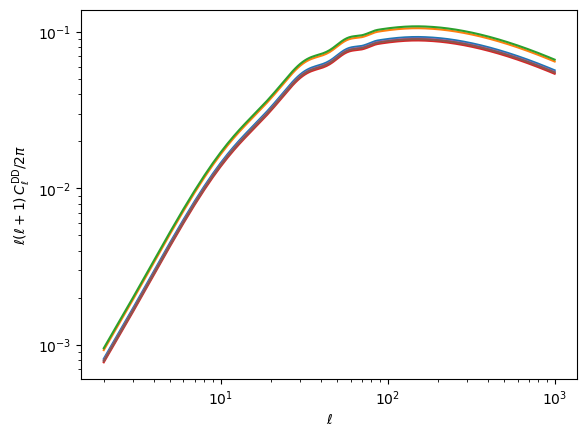

In [5]:
import matplotlib.pyplot as plt

for k, Cell_z in enumerate(Cell1_new):
    plt.plot(ell[2:], ell[2:]*(ell[2:]+1) * Cell_z[2:] / (2*np.pi))

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)\,C_{\ell}^{\mathrm{DD}}/2\pi$')

In [6]:
Cell1_new_alt = my_signals.Cell1_new_alt()

In [7]:
np.shape(Cell1_new_alt)

(3, 9, 1001)